In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import Levenshtein

from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, ParameterGrid
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
rnafold = pd.read_csv('datasets/others/yuanli.csv')
rnafold['sequence'] = rnafold['A'] + rnafold['B']
#rnafold = rnafold[['sequence', 'fluo_8h']]
rnafold

,id,A,B,fluo,sequence
0,1,GGTCTTACTTCAATTCTAGC,ACTTCAGCATTTCATCATCC,13.0,GGTCTTACTTCAATTCTAGCACTTCAGCATTTCATCATCC
1,2,GCTCACTTCACTTATCATCC,ACTATCCGAGATCATTCACC,32.3,GCTCACTTCACTTATCATCCACTATCCGAGATCATTCACC
2,5,ATGTACGAATAGCTAGCCAT,GCACGCAGTTTAGAATCAGG,33.3,ATGTACGAATAGCTAGCCATGCACGCAGTTTAGAATCAGG
3,8,TGAAATGTTACCTGATCTAG,TCCATACTCTACTCGCTACC,272.7,TGAAATGTTACCTGATCTAGTCCATACTCTACTCGCTACC
4,9,CCTCATGTGCGTCTAATCTT,GCATCAGTTAGTTAGTATAG,13.7,CCTCATGTGCGTCTAATCTTGCATCAGTTAGTTAGTATAG
5,11,AGTGGAGTGGAGTGGATGGT,CGAAGTAAGCTCAAGATCAG,22.7,AGTGGAGTGGAGTGGATGGTCGAAGTAAGCTCAAGATCAG
6,12,TGCTATGTGACCTGATGATG,GCAAAGTGAAATGAGTAGGA,12.3,TGCTATGTGACCTGATGATGGCAAAGTGAAATGAGTAGGA
7,13,CTATACTACTGCTCCGACTT,GCTTACCTTACTCTACCTCA,54.7,CTATACTACTGCTCCGACTTGCTTACCTTACTCTACCTCA
8,14,TGTCTACCCGTATCTCAACT,TCACATCTATCTACTTACTC,47.3,TGTCTACCCGTATCTCAACTTCACATCTATCTACTTACTC
9,15,TACTTCATTTCATCCTAGCT,TCACTTATCCTATTCTACCC,175.3,TACTTCATTTCATCCTAGCTTCACTTATCCTATTCTACCC


#### String similarity model

Levenshtein distance.

In [20]:
similarities = []
for i in range(rnafold.shape[0]-1):
    diff = []
    f_diff = []
    for j in range(i, rnafold.shape[0]-1):
        diff.append(Levenshtein.distance(rnafold['sequence'].iloc[i], rnafold['sequence'].iloc[(j+1)]))
        f_diff.append(np.abs(rnafold['fluo'].iloc[i] - rnafold['fluo'].iloc[(j+1)]))
    similarities.append(sorted([(x, y) for x, y in zip(diff, f_diff)]))

[[1.         0.05931124]
 [0.05931124 1.        ]]


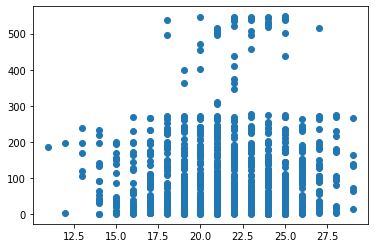

In [21]:
q = pd.DataFrame([i for temp in similarities for i in temp])
print(np.corrcoef(q[0], q[1]))
plt.scatter(q[0], q[1])
plt.show()

Cosine similarity.

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
#eng_feats = ['MFE', 'free_energy_thermodynamic_ensemble', 'frequency_MFR_structures', 'delta_G', \
#           'GC_content', 'GC_7bp', 'percent_match_no_spacer', 'percent_match_with_spacer', 'homology']

def getKmers(sequence, size=7):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

rnafold['words'] = rnafold.apply(lambda x: getKmers(x['sequence']), axis=1)

texts = list(rnafold['words'])
for item in range(len(texts)):
    texts[item] = ' '.join(texts[item])

cv = CountVectorizer(ngram_range=(2, 2))

X = cv.fit_transform(texts)
#X_complete = pd.concat([pd.DataFrame(X_seq_only.toarray()), rnafold[eng_feats]], axis=1)
#X_no_seq = rnafold[eng_feats]
y = rnafold['fluo']
#y_cat = to_categorical(pd.qcut(y, 3, labels=False))

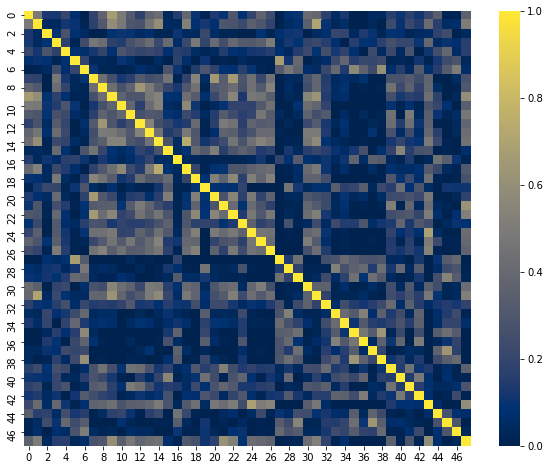

In [23]:
plt.figure(figsize=[10, 8])
csim = cosine_similarity(X)
sns.heatmap(csim, cmap='cividis')
plt.show()

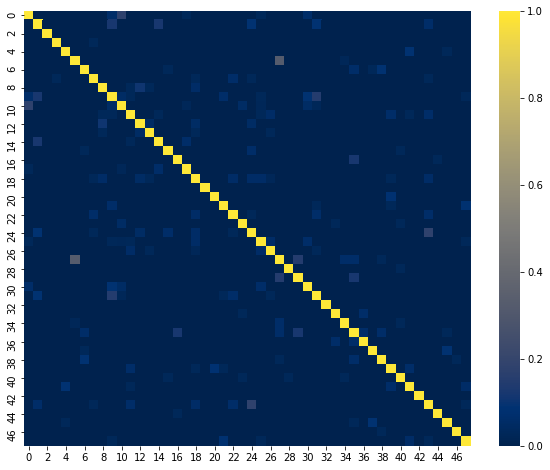

In [29]:
plt.figure(figsize=[10, 8])
csim = cosine_similarity(X)
sns.heatmap(csim, cmap='cividis')
plt.show()

In [9]:
def cosine_sim_vectors(vec1, vec2):
    vec1 = vec1.values.reshape(1, -1)
    vec2 = vec2.values.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]

In [10]:
similarities = []
for i in range(X.shape[0]-1):
    diff = []
    f_diff = []
    for j in range(i, X.shape[0]-1):
        diff.append(cosine_sim_vectors(rnafold['sequence'].iloc[i], rnafold['sequence'].iloc[(j+1)]))
        f_diff.append(np.abs(rnafold['fluo'].iloc[i] - rnafold['fluo'].iloc[(j+1)]))
    similarities.append(sorted([(x, y) for x, y in zip(diff, f_diff)]))

AttributeError: 'str' object has no attribute 'values'

### Classical Machine Learning

#### Regression with sequence-only features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressors = [
    ('Linear Regressor', LinearRegression()),
    ('Ridge Regressor', Ridge()),
    ('Lasso Regressor', Lasso()),
    #('SGD Regressor', SGDRegressor()),
    ('k Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Linear SVM', SVR(kernel='linear')),
    ('RBF Regressor', SVR(kernel='rbf')),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', RandomForestRegressor()),
    ('Neural Network (MLP)', MLPRegressor())
]
results = []
for regressor in tqdm(regressors):
    cv_results = cross_validate(regressor[1], X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))
    rmse = ([np.sqrt(i) for i in (cv_results['test_neg_mean_squared_error'] * -1)]) 
    for m in rmse:
        results.append(('Sequence only', regressor[0], m))
'''
for regressor in tqdm(regressors):
    cv_results = cross_validate(regressor[1], X_complete, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))
    rmse = ([np.sqrt(i) for i in (cv_results['test_neg_mean_squared_error'] * -1)])
    for m in rmse:
        results.append(('Sequence + engineered features', regressor[0], m))
        
for regressor in tqdm(regressors):
    cv_results = cross_validate(regressor[1], X_no_seq, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))
    rmse = ([np.sqrt(i) for i in (cv_results['test_neg_mean_squared_error'] * -1)]) 
    for m in rmse:
        results.append(('Engineered features', regressor[0], m))
'''    
perf = pd.DataFrame(results, columns=['Features', 'Model', 'RMSE'])
perf

In [ ]:
plt.figure(figsize=[12, 4])
sns.pointplot(data=perf, x='Model', y='RMSE', join=False)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
sns.despine()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)
#print(X_train.shape, X_test.shape)

results1 = []
for regressor in tqdm(regressors):
    regressor[1].fit(X_train, y_train)
    y_pred = regressor[1].predict(X_test)
    results1.append((regressor[0], y_test, y_pred))
    
f, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(16, 5))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < 10:
        pearson = np.round(np.corrcoef(results1[i][1], results1[i][2]).ravel()[1], 2)
        r2 = np.round(r2_score(results1[i][1], results1[i][2]))
        sns.regplot(results1[i][1], results1[i][2], ax=ax, label='r={}'.format(pearson))
        #ax.axhline(y=0, color='r', linestyle='-')
        ax.set_title(results1[i][0])
        #plt.xticks(rotation=90)
        ax.set_xlabel('Experiment')
        ax.set_ylabel('Prediction')
        ax.legend(loc=4)
    else:
        ax.set_visible(False)
plt.tight_layout()
sns.despine()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#print(X_train.shape, X_test.shape)

results1 = []
for regressor in tqdm(regressors):
    regressor[1].fit(X_train, y_train)
    y_pred = regressor[1].predict(X_test)
    results1.append((regressor[0], y_test, y_pred))
    
f, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(16, 5))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < 10:
        pearson = np.round(np.corrcoef(results1[i][1], results1[i][2]).ravel()[1], 2)
        r2 = np.round(r2_score(results1[i][1], results1[i][2]))
        sns.regplot(results1[i][1], results1[i][2], ax=ax, label='r={}'.format(pearson))
        #ax.axhline(y=0, color='r', linestyle='-')
        ax.set_title(results1[i][0])
        #plt.xticks(rotation=90)
        ax.set_xlabel('Experiment')
        ax.set_ylabel('Prediction')
        ax.legend(loc=4)
    else:
        ax.set_visible(False)
plt.tight_layout()
sns.despine()

#### Hyperparameters tuning

In [ ]:
params = {
    'kmers': [2, 3, 4, 5],
    'ngram_low': [1, 2],
    'ngram_up': [3, 4] 
}

best_params_all = []
for regressor in tqdm(regressors):
    
    perf = []
    grid = ParameterGrid(params)
    for g in grid:

        df = rnafold[['sequence', 'fluo']]
        df['words'] = df.apply(lambda x: getKmers(x['sequence'], g['kmers']), axis=1)

        texts = list(df['words'])
        for item in range(len(texts)):
            texts[item] = ' '.join(texts[item])
        cv = CountVectorizer(ngram_range=(g['ngram_low'], g['ngram_up']))
        X = cv.fit_transform(texts)
        #X_complete = pd.concat([pd.DataFrame(X_seq_only.toarray()), rnafold[eng_feats]], axis=1)
        #X_no_seq = rnafold[eng_feats]
        y = rnafold['fluo']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

        regressor[1].fit(X_train, y_train)
        y_pred = regressor[1].predict(X_test)
        perf.append(mean_squared_error(y_test, y_pred))

    best_idx = perf.index(max(perf))
    best_params = (list(grid))[best_idx]
    best_params_all.append((regressor[0], regressor[1], best_params))
    
best_params_all

In [ ]:
results2 = []
for best_params in tqdm(best_params_all):
    df = rnafold[['sequence', 'fluo']]
    df['words'] = df.apply(lambda x: getKmers(x['sequence'], best_params[2]['kmers']), axis=1)

    texts = list(df['words'])
    for item in range(len(texts)):
        texts[item] = ' '.join(texts[item])
    cv = CountVectorizer(ngram_range=(best_params[2]['ngram_low'], best_params[2]['ngram_up']))
    X = cv.fit_transform(texts)
    #X_complete = pd.concat([pd.DataFrame(X_seq_only.toarray()), rnafold[eng_feats]], axis=1)
    #X_no_seq = rnafold[eng_feats]
    y = rnafold['fluo']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    regressor = best_params[1]
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    results2.append((best_params[0], y_test, y_pred))
    
f, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(15, 6))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < 10:
        #ax.scatter(results1[i][1], results1[i][2], color='b', label='not-tuned')
        pearson = np.round(np.corrcoef(results2[i][1], results2[i][2]).ravel()[1], 2)
        print(results1[i][0], np.corrcoef(results2[i][1], results2[i][2]))
        sns.regplot(results2[i][1], results2[i][2], color='g', label='r={}'.format(pearson), ax=ax)
        #ax.axhline(y=0, color='r', linestyle='-')
        ax.set_title(results1[i][0])
        #plt.xticks(rotation=90)
        ax.set_xlabel('Experiment')
        ax.set_ylabel('Predicted')
        ax.legend()
    else:
        ax.set_visible(False)
        
plt.tight_layout()
sns.despine()

In [ ]:
results2 = []
for best_params in tqdm(best_params_all):
    df = rnafold[['sequence', 'fluo']]
    df['words'] = df.apply(lambda x: getKmers(x['sequence'], best_params[2]['kmers']), axis=1)

    texts = list(df['words'])
    for item in range(len(texts)):
        texts[item] = ' '.join(texts[item])
    cv = CountVectorizer(ngram_range=(best_params[2]['ngram_low'], best_params[2]['ngram_up']))
    X = cv.fit_transform(texts)
    #X_complete = pd.concat([pd.DataFrame(X_seq_only.toarray()), rnafold[eng_feats]], axis=1)
    #X_no_seq = rnafold[eng_feats]
    y = rnafold['fluo']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    regressor = best_params[1]
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    results2.append((best_params[0], y_test, y_pred))
    
f, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(15, 6))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < 10:
        #ax.scatter(results1[i][1], results1[i][2], color='b', label='not-tuned')
        pearson = np.round(np.corrcoef(results2[i][1], results2[i][2]).ravel()[1], 2)
        sns.regplot(results2[i][1], results2[i][2], color='g', label=pearson, ax=ax)
        #ax.axhline(y=0, color='r', linestyle='-')
        ax.set_title(results1[i][0])
        #plt.xticks(rotation=90)
        ax.set_xlabel('Experiment')
        ax.set_ylabel('Predicted')
        ax.legend()
    else:
        ax.set_visible(False)
        

plt.tight_layout()
sns.despine()